Day 3 

Exercises: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.

* What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

That the differnce between people whop have many friends and people who have few friends, in reality, inst not that big as a random network would have you believe. 

* List the four regimes that characterize random networks as a function of ⟨k⟩

subcritical regime, critical point, supercritical regime and connected regime. 

**Connected regime:** 
⟨k⟩ is large enough that almost all nodes are part of a single, connected component.
The network is essentially fully connected except for a few isolated nodes.

**Supercritical regime:**
⟨k⟩ > 1 but not much larger.
A giant connected component exists, containing a significant fraction of the nodes, but there are still many small clusters.

**Critical point:**

⟨k⟩ ≈ 1 The network is at a phase transition. A giant component starts to emerge, but most nodes are still in small clusters.

**Subcritical regime:**
⟨k⟩ < 1.
The network consists mostly of small, isolated clusters. There is no giant connected
    
* According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k)
decreases as a function of *k* in real-world networks?

The whole assumption of random networks goes to shit 

Exercises: WS edition.

First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,
 and 1
. Calculate the average shortest path length ⟨d⟩
 for each one.
Describe what happens to the network when p=1


In [1]:
import matplotlib.pyplot as plt 
import networkx as nx 
import numpy as np 


In [11]:
N_nodes = 500
k_mu = 4 
p_s = [0,0.1,1]
G0 = nx.watts_strogatz_graph(N_nodes,k_mu,p_s[0])
G1 = nx.watts_strogatz_graph(N_nodes,k_mu,p_s[1])
G2 = nx.watts_strogatz_graph(N_nodes,k_mu,p_s[2])
d0 = nx.average_shortest_path_length(G0)
d1 = nx.average_shortest_path_length(G1)
d2 = nx.average_shortest_path_length(G2)

print(f"Average shortest path length for p=0: {np.round(d0,2)}")
print(f"Average shortest path length for p=0.1: {np.round(d1,2)}")
print(f"Average shortest path length for p=1: {np.round(d2,2)}")

Average shortest path length for p=0: 62.88
Average shortest path length for p=0.1: 7.4
Average shortest path length for p=1: 4.73


When p=1 all edges are randomly rewired and we get a totally random network

Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0

* What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.



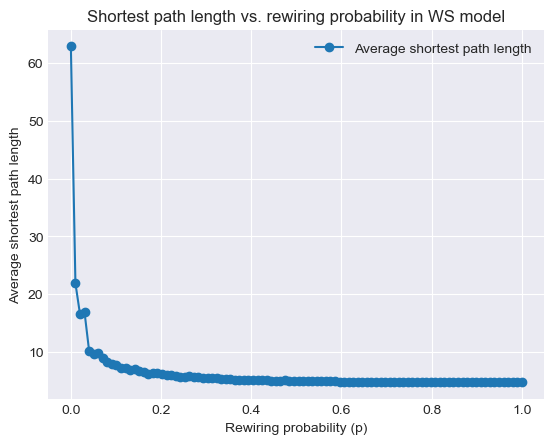

The first value is 0.010101010101010102 which more than halves the average shortest path compared to p_0


In [31]:
p_values = np.linspace(0,1,100)
shortest_d_values = []

for p in p_values:
    G =  nx.watts_strogatz_graph(N_nodes,k_mu,p)
    shortest_d = nx.average_shortest_path_length(G)
    shortest_d_values.append(shortest_d)

plt.errorbar(p_values, shortest_d_values, fmt='o-', label='Average shortest path length')
plt.xlabel('Rewiring probability (p)')
plt.ylabel('Average shortest path length')
plt.title('Shortest path length vs. rewiring probability in WS model')
plt.grid(True)
plt.legend()
plt.show()

print(f"The first value is {p_values[1]} which more than halves the average shortest path compared to p_0")    

In [32]:
print(f"We converge towards {shortest_d_values[99]}")

We converge towards 4.756769539078157


For a rewiring probability only a tiny bit higher than zero we see that the avarage shortest path drops drastically. 
The first value is 0.01 which more than halves the average shortest path compared to p_0

Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. 

* Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. 

* Use the standard deviation to add errorbars to the plot. 

My version of the plot is below (since a picture's worth 1000 words).
Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

In [25]:
p_vals=[0,0.01,0.03,0.05,0.1,0.2]
N_nodes = 500
k_mu = 4 
N = 50
stds = []
mean_shortest_d = []
for p in p_vals:
    shortest_d_values = []
    for _ in range(N):
        G =  nx.watts_strogatz_graph(N_nodes,k_mu,p)
        shortest_d = nx.average_shortest_path_length(G)
        shortest_d_values.append(shortest_d)
    mean_shortest_d.append(np.mean(shortest_d_values))
    std = np.std(shortest_d_values)
    stds.append(std)



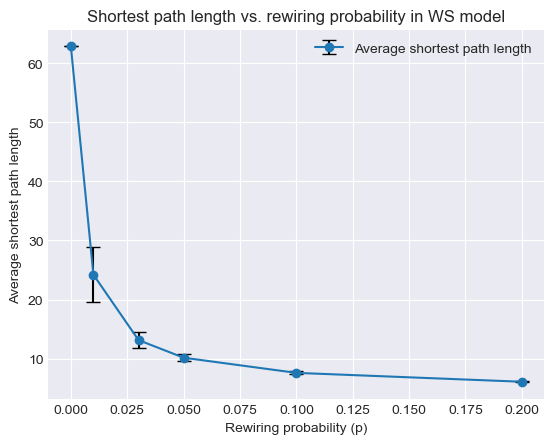

In [36]:
plt.errorbar(p_vals, mean_shortest_d, yerr=stds, fmt='o-', capsize=5, label='Average shortest path length',ecolor='black')
plt.xlabel('Rewiring probability (p)')
plt.ylabel('Average shortest path length')
plt.title('Shortest path length vs. rewiring probability in WS model')
plt.grid(True)
plt.legend()
plt.show()


We observe that the shortest path length drops dramastically as soon as we introduce only a tiny amount of randomness, by setting the rewiring probability 0.1 instead of 0. We also see that the std drops as the rewiring probability increases, meaning that the more random the network is the smaller the standard deviation is in its average shortest path. 

## Part 2 

First a couple of questions to make sure that you've actually read the text.

* What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

In scale free networks the degree distribution follow a power law distribution: 

$$
p_k \sim k^{-\lambda}
$$
We have three regimes for complex networks

* Anamalous regime $\lambda \leq 2 $. Here the exponent is larger then one and the number of links to the largerst hub grow faster than the number of nodes in the network. This means that large networks of this kind is impossible.

* scale free regime $2 < \lambda <3 $.  Networks here are ultra-small where hubs make path lengths "ultra-short"

* random network regime $3 < \lambda  $ almost indistinguashble from a random network

* What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

1. Sublinear Preferential Attachment (0 < α < 1): For any α > 0 new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, not sufficient to generate a scale-free degree distribution.
2. Linear Regime (α=1) : This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
3. Superlinear Preferential Attachment (α > 1) : For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-gets-richer process. The consequence of this is most obvious for α > 2, when the model predicts a winner-takes-all phenomenon

We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:

* First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
* Now add another node, connecting one of the existing nodes in proportion to their degree.
* Keep going until you have a 100 node network.
    Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.
* Plot the network.
* Add more nodes until you have a 5000 node network.
* What's the maximum and minimum degree?
* Now, bin the degree distribution using numpy.histogram.
* Plot the distribution. Plot it with both linear and log-log axes.

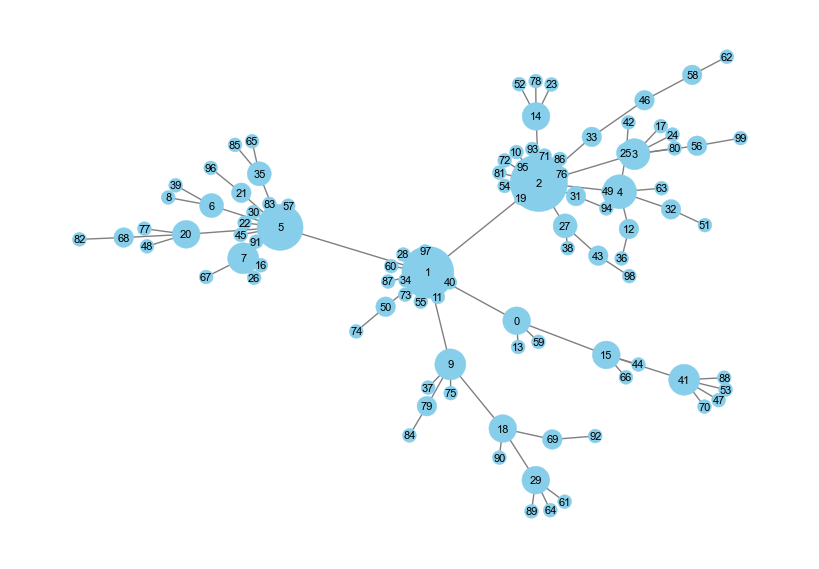

In [292]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8')
def create_graph_BA(size):
    Graph = nx.Graph() 
    Graph.add_edge(0,1)
    for i in range(1,size):
        choice = np.random.choice(np.array(Graph.edges()).flatten())
        Graph.add_edge(i,choice)
    return Graph

Graph = create_graph_BA(100)
# Node sizes proportional to degree
sizes = [Graph.degree(n) * 100 for n in Graph.nodes()]

nx.draw(
    Graph,
    with_labels=True,
    node_size=sizes,
    node_color="skyblue",
    edge_color="gray",
    font_size=8
)

plt.show()



In [ ]:
Graph_5000 = create_graph_BA(5000)

degrees = np.array(Graph_5000.degree())
print(f"The max degree is {np.max(degrees[:,1])} and the minimum is {np.min(degrees[:,1])}")

The max degree is 191 and the minimum is 1


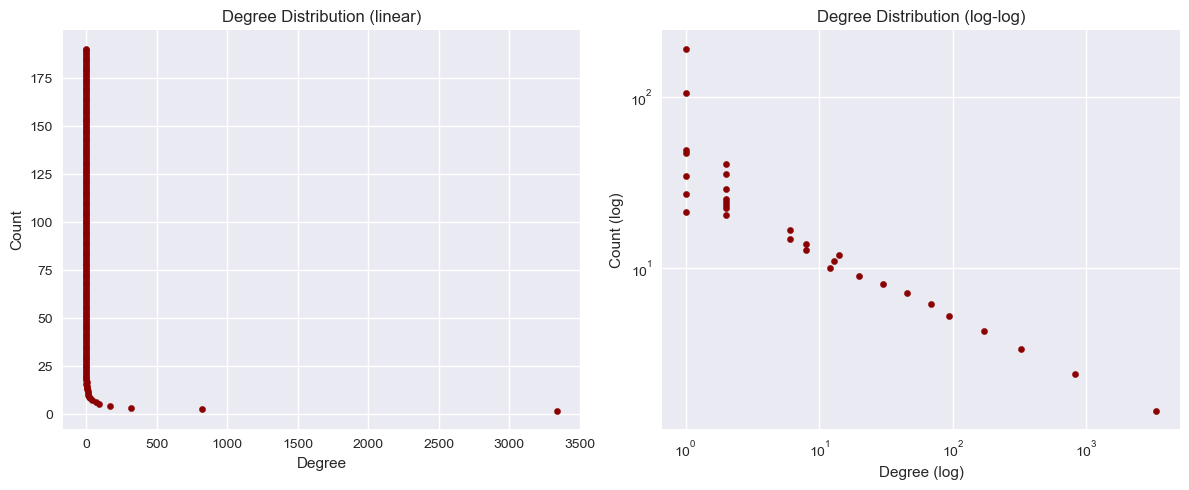

In [72]:

counts, bins = np.histogram(degrees[:,1],bins = 200)
bins = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(12,5))

# Linear histogram
plt.subplot(1,2,1)
plt.scatter(counts,bins, color = 'darkred',s=20)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree Distribution (linear)")

# Log-log histogram
plt.subplot(1,2,2)
plt.scatter(counts,bins, color = 'darkred',s=20)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log)")
plt.ylabel("Count (log)")
plt.title("Degree Distribution (log-log)")

plt.tight_layout()
plt.show()


## Part 3 

Exercise. The friendship paradox in BA networks

* Pick a node  i at random (e.g. use random.choice). Find its degree.
* Find  i's neighbors. And calculate their average degree.
* Compare the two numbers to check if it's true that  i's friends (on average) have more friends than  i
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [290]:
def check_friendship_paradox(Graph_5000):
    t_f = []
    nodes = list(Graph_5000.nodes())
    degrees = np.array(Graph_5000.degree())

    for _ in range(1000):
        idx = np.random.choice(nodes)
        idx_degree = degrees[idx,1]

        neighbors = list(Graph_5000.neighbors(idx))
        neighbor_degree = np.mean(degrees[neighbors,1])

        t_f.append(neighbor_degree > idx_degree)

    num_true = t_f.count(True)
    percentage_true = num_true/(1000)*100 
    print(f"{percentage_true} % of the time the friendship paradox is true")

check_friendship_paradox(Graph_5000)


86.3 % of the time the friendship paradox is true


Exercise. The friendship paradox more generally

What if the power law is flatter, e.g.  p(k)∼k−γ
  with  γ=2 ? Will the fraction of times the paradox is true be higher or lower?
* First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
* Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the    configuation model. The networkx funtion is here nx.configuration_model. I suggest you make the network pretty big ... let's say 5000 nodes or more.
* Hint 0: In the networkx function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number  r
  uniformly distributed in the range  0≤r<1
 , then  x=xmin(1–r)−1/α−1
  is a random power-law-distributed real number in the range  xmin≤x<∞
  with exponent  α
 . Note that there has to be a lower limit  xmin
  on the range; the power-law distribution diverges as  x→0
 . See section 2 this paper for more details (especially the  ‡
  footnote).
* Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
* Hint 2: Also, due to some details of how the configuation works (see the wiki page for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
* Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

i reckon it will be higher. For $\gamma$ values between 2 and 3 we expect to get a lot of hubs. So if you check the degree of 2 neighbors, than the chance of these to being hubs with more connections is even higher.

In [300]:
def plot_graph(Graph):
    sizes = [Graph.degree(n) * 100 for n in Graph.nodes()]
    plt.figure(figsize=(8,6))
    nx.draw(
        Graph,
        with_labels=True,
        node_size=sizes,
        node_color="skyblue",
        edge_color="gray",
        font_size=8
    )

    plt.show()

alpha, gamma = 2,2 

x_min = 1
x = []
for _ in range(5000):
    r = np.random.rand()
    number = x_min * (1 - r)**(-1/(alpha - 1))
    x.append(int(round(number)))
x = np.array(x)
if x.sum()%2 != 0: 
    x[0] += 1

Graph = nx.configuration_model(x)

check_friendship_paradox(Graph)


98.2 % of the time the friendship paradox is true


I reasoned correctly.


Exercise. The friendship paradox and the configuration model

* Now generate a network for the configuration model that has the same slope and number of nodes as F-BA in A above; let's call this new network F-CM (for friendship configuration model).
* What fraction of the time is the friendship paradox is true for the F-CM network?

Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
* Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
* How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

The Barabási–Albert (BA) networks produces hubs, i few cluster(triangels) and has a few very big hubs that dominate the image

The Configuration Model (CM) gets the same degree as the BA as we create it from the BA's degree distributuion, but the structure is randomized otherwise. 

This means that for CM the friendship paradox will probably be true less often than for the CM. 
We should probably run the friendship test on many such networks and look at the std and variance. 

In [ ]:
import numpy as np

def check_friendship_paradox(G, samples=1000):
    deg = dict(G.degree())   # safer: dictionary lookup
    nodes = list(G.nodes())
    t_f = []

    for _ in range(samples):
        node = np.random.choice(nodes)
        k_i = deg[node]

        neighbors = list(G.neighbors(node))
        if not neighbors:   # skip isolates (degree 0)
            continue

        mean_neighbor_deg = np.mean([deg[n] for n in neighbors])
        t_f.append(mean_neighbor_deg > k_i)

    if not t_f:  # if everything skipped (rare)
        print("No valid samples (all isolates).")
        return None

    percentage_true = sum(t_f) / len(t_f) * 100
    # print(f"{percentage_true:.2f}% of the time the friendship paradox is true")
    return percentage_true


In [320]:
size = 5000
BA =  nx.barabasi_albert_graph(size, 3)
deg_sequence = [d for _, d in BA.degree()]
CM = nx.configuration_model(deg_sequence)

CM = nx.Graph(CM)   
CM.remove_edges_from(nx.selfloop_edges(CM))
print(f"For the BA network we get: ")
check_friendship_paradox(BA)
print(f"\nFor the CM network we get: ")
check_friendship_paradox(CM)


For the BA network we get: 
90.10% of the time the friendship paradox is true

For the CM network we get: 
90.10% of the time the friendship paradox is true


90.10000000000001

Exercise: Growth without preferential attachment

Finally, we'll build a network of same size and degree as in the exercise above, using the growth mechanism without the preferential attachment. Follow the steps below for success

* Grow a new network (the Sune-network) with the same parameters as the F-BA network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: have the incoming nodes connect to the existing nodes with equal probability. This is the Sune-network.
* Generate an ER network of same number of nodes and links as the Sune-network.
* What are the differences between the ER network and the Sune-network? Explain in your own words.
* *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

BA = growth + preferential attachment → hubs, scale-free.

Sune = growth + uniform attachment → random-like but connected.

ER = random edges → random-like, possibly disconnected

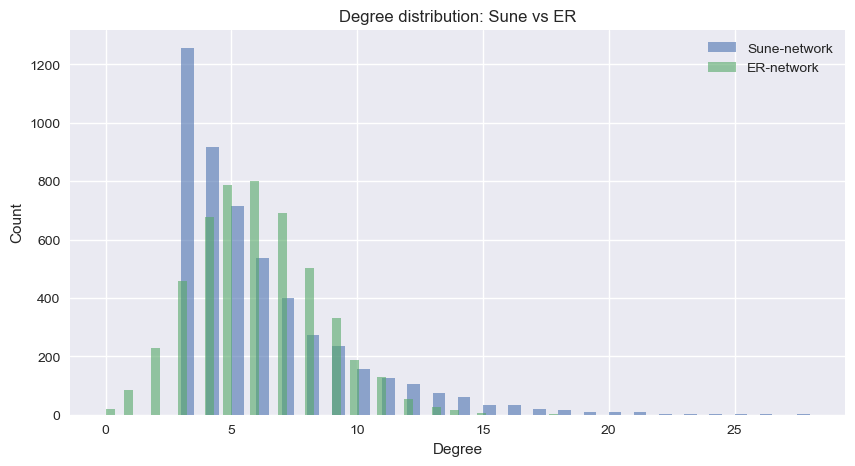

Sune-network edges: 14994
ER-network edges:   14904
Connected components (Sune): 1
Connected components (ER):   19


In [322]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def sune_network(n, m):
    """
    Build a 'Sune-network':
    - Start with a small connected seed (complete graph of m nodes)
    - Add nodes one by one
    - Each new node attaches to m existing nodes chosen uniformly at random
    """
    G = nx.complete_graph(m)  # small seed
    for new_node in range(m, n):
        targets = np.random.choice(list(G.nodes()), size=m, replace=False)
        for t in targets:
            G.add_edge(new_node, t)
    return G

# Parameters
n = 5000
m = 3   # same as BA before

# 1. Build Sune-network
Sune = sune_network(n, m)

# 2. Generate ER network with same #nodes and #edges
num_edges = Sune.number_of_edges()
p = 2*num_edges / (n*(n-1))  # edge probability to match expected edge count
ER = nx.erdos_renyi_graph(n, p)

# --- Compare degree distributions ---
deg_sune = [d for _, d in Sune.degree()]
deg_er = [d for _, d in ER.degree()]

plt.figure(figsize=(10,5))
plt.hist(deg_sune, bins=50, alpha=0.6, label="Sune-network")
plt.hist(deg_er, bins=50, alpha=0.6, label="ER-network")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution: Sune vs ER")
plt.legend()
plt.show()

# --- Compare connected components ---
comp_sune = nx.number_connected_components(Sune)
comp_er = nx.number_connected_components(ER)

print(f"Sune-network edges: {num_edges}")
print(f"ER-network edges:   {ER.number_of_edges()}")
print(f"Connected components (Sune): {comp_sune}")
print(f"Connected components (ER):   {comp_er}")
